**Credit Scoring and Segmentation Analysis**

Objective:

Analyze key financial factors (e.g., Credit Utilization Ratio, Payment History) to calculate credit scores and segment customers using clustering techniques.

Highlights:

* Visualize credit behavior trends.
* Calculate credit scores using a weighted formula.
* Segment customers into risk categories (Excellent, Good, Low, Very Low).

Tools: Python, pandas, numpy, matplotlib, seaborn, plotly, sklearn.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv("/content/credit_scoring.csv")
data.shape

(1000, 12)

In [ ]:
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [ ]:
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


<ipython-input-7-8e1511b619df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-7-8e1511b619df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True, cmap="YlGnBu")


<Axes: >

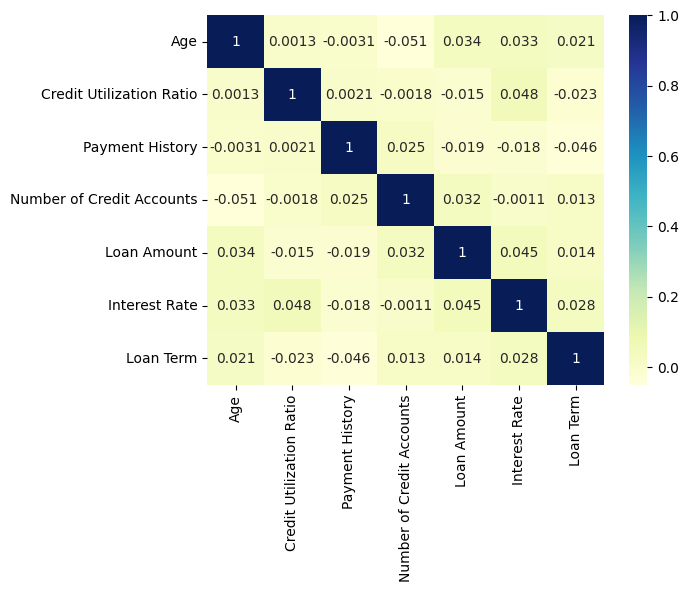

In [ ]:
data.corr()
sns.heatmap(data.corr(), annot= True, cmap="YlGnBu")

In [ ]:
credit_utilization_fig = px.box(data, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show()

In [ ]:
loan_amount_fig = px.histogram(data, x='Loan Amount',
                               nbins=20,
                               title='Loan Amount Distribution')
loan_amount_fig.show()

In [ ]:
# calculate the credit score using the fico score
# Define the mapping for categorical features

# data['Education Level'] = data['Education Level'].str.strip().str.upper()

education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
data['Education Level'] = data['Education Level'].map(education_level_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status'] # accesses the value in the 'Employment Status' column of the DataFrame row and assigns it to the variable employment_status
    #use row instead of using the row with df to create the formular, may look somehow

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
data['Credit Score'] = credit_scores

data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


### Segmentation based on credit score

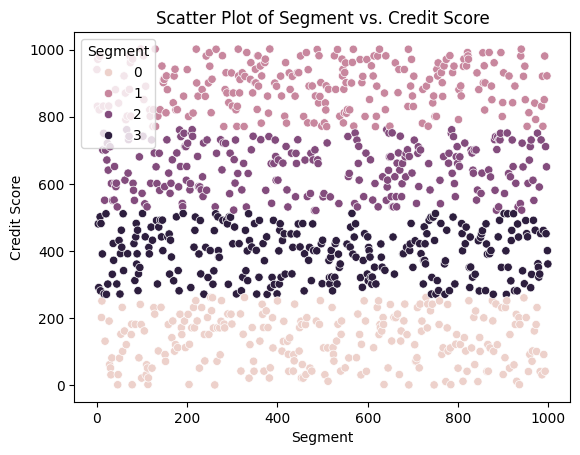

<Figure size 1300x1000 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans

X = data[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=15)
kmeans.fit(X)
data['Segment']= kmeans.labels_
data.head()
data['Segment'].value_counts()
mean_segment_by_category = data.groupby('Segment')['Credit Score'].mean()

sns.scatterplot(data=data, x= data.index, y='Credit Score', hue='Segment')
plt.title('Scatter Plot of Segment vs. Credit Score')
plt.xlabel('Segment')
plt.ylabel('Credit Score')
plt.figure(figsize=(13,10))
plt.show()

In [ ]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan', 'Credit Score'],
      dtype='object')

In [ ]:
data['Segment'] = data['Segment'].map({2: 'Very Low',
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,Segment
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516,NaN
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360,NaN
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216,NaN
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586,NaN
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797,NaN
